# Benson  
Topic: Explore MTA turnstile data  
Date: 04/01/2016  
Name: Elizabeth Bianco  
Worked with: Hyatt, Iain, Melanie

**Challenge 1**

In [1]:
import csv
import datetime
from dateutil.parser import *
from collections import OrderedDict, defaultdict

In [2]:
mydict = {}
f = open('turnstile_160319.csv', 'r')
reader = csv.reader(f)
next(reader)
for row in reader:
    controlArea = row[0]
    unit = row[1]
    scp = row[2]
    station = row[3]
    linename = row[4]
    division = row[5]
    date = row[6]
    time = row[7]
    desc = row[8]
    entries = row[9]
    exits = row[10]
    key = (controlArea, unit, scp, station)
    value = [linename, division, date, time,desc, entries, exits.strip()]    
    if key in mydict:
        mydict[key].append(value)
    else:
        mydict[key] = [value]
f.close()

 

In [3]:
dictlist = [{k:v} for k, v in mydict.items()]
print (dictlist[:10])

[{('R550', 'R072', '00-00-03', '34 ST-HUDSON YD'): [['7', 'IRT', '03/12/2016', '03:00:00', 'REGULAR', '0000022076', '0000056994'], ['7', 'IRT', '03/12/2016', '07:00:00', 'REGULAR', '0000022077', '0000057013'], ['7', 'IRT', '03/12/2016', '11:00:00', 'REGULAR', '0000022086', '0000057107'], ['7', 'IRT', '03/12/2016', '15:00:00', 'REGULAR', '0000022139', '0000057236'], ['7', 'IRT', '03/12/2016', '19:00:00', 'REGULAR', '0000022201', '0000057285'], ['7', 'IRT', '03/12/2016', '23:00:00', 'REGULAR', '0000022238', '0000057308'], ['7', 'IRT', '03/13/2016', '04:00:00', 'REGULAR', '0000022244', '0000057315'], ['7', 'IRT', '03/13/2016', '08:00:00', 'REGULAR', '0000022244', '0000057337'], ['7', 'IRT', '03/13/2016', '12:00:00', 'REGULAR', '0000022257', '0000057402'], ['7', 'IRT', '03/13/2016', '16:00:00', 'REGULAR', '0000022299', '0000057537'], ['7', 'IRT', '03/13/2016', '20:00:00', 'REGULAR', '0000022379', '0000057566'], ['7', 'IRT', '03/14/2016', '00:00:00', 'REGULAR', '0000022392', '0000057580'], 

**Challenge 2**

In [4]:
timedict = {}
f = open('turnstile_160319.csv', 'r')
reader = csv.reader(f)
next(reader)
for row in reader:
    controlArea = row[0]
    unit = row[1]
    scp = row[2]
    station = row[3]
    linename = row[4]
    division = row[5]
    date = row[6]
    time = row[7]
    desc = row[8]
    try:
        entries = int(row[9].lstrip('0'))
    except ValueError:
        entries = 0
    exits = row[10]
    key = (controlArea, unit, scp, station)
    datetime = date +' ' + time
    value = [parse(datetime), entries]
    if key in timedict:
        timedict[key].append(value)
    else:
        timedict[key] = [value]
f.close()

In [5]:
timedictlist = [{k:v} for k, v in timedict.items()]
print (timedictlist[:10])

[{('R550', 'R072', '00-00-03', '34 ST-HUDSON YD'): [[datetime.datetime(2016, 3, 12, 3, 0), 22076], [datetime.datetime(2016, 3, 12, 7, 0), 22077], [datetime.datetime(2016, 3, 12, 11, 0), 22086], [datetime.datetime(2016, 3, 12, 15, 0), 22139], [datetime.datetime(2016, 3, 12, 19, 0), 22201], [datetime.datetime(2016, 3, 12, 23, 0), 22238], [datetime.datetime(2016, 3, 13, 4, 0), 22244], [datetime.datetime(2016, 3, 13, 8, 0), 22244], [datetime.datetime(2016, 3, 13, 12, 0), 22257], [datetime.datetime(2016, 3, 13, 16, 0), 22299], [datetime.datetime(2016, 3, 13, 20, 0), 22379], [datetime.datetime(2016, 3, 14, 0, 0), 22392], [datetime.datetime(2016, 3, 14, 4, 0), 22395], [datetime.datetime(2016, 3, 14, 8, 0), 22396], [datetime.datetime(2016, 3, 14, 12, 0), 22411], [datetime.datetime(2016, 3, 14, 16, 0), 22428], [datetime.datetime(2016, 3, 14, 20, 0), 22440], [datetime.datetime(2016, 3, 15, 0, 0), 22448], [datetime.datetime(2016, 3, 15, 4, 0), 22450], [datetime.datetime(2016, 3, 15, 8, 0), 22450]

**Challenge 3**

In [6]:
daydict = defaultdict(list)
for key, rows in timedict.items():
    rows.sort(key = lambda x: x[0])
    for i in range(len(rows)-1):
        daydict[key].append([rows[i][0], rows[i+1][1]-rows[i][1]])


f.close()
    

In [7]:
daydictlist = [{k:v} for k, v in daydict.items()]
print (daydictlist[:10])
    

[{('D015', 'R396', '00-00-01', 'AVENUE U'): [[datetime.datetime(2016, 3, 12, 0, 0), 3], [datetime.datetime(2016, 3, 12, 4, 0), 55], [datetime.datetime(2016, 3, 12, 8, 0), 147], [datetime.datetime(2016, 3, 12, 12, 0), 90], [datetime.datetime(2016, 3, 12, 16, 0), 65], [datetime.datetime(2016, 3, 12, 20, 0), 30], [datetime.datetime(2016, 3, 13, 0, 0), 5], [datetime.datetime(2016, 3, 13, 5, 0), 57], [datetime.datetime(2016, 3, 13, 9, 0), 145], [datetime.datetime(2016, 3, 13, 13, 0), 71], [datetime.datetime(2016, 3, 13, 17, 0), 34], [datetime.datetime(2016, 3, 13, 21, 0), 16], [datetime.datetime(2016, 3, 14, 1, 0), 5], [datetime.datetime(2016, 3, 14, 5, 0), 204], [datetime.datetime(2016, 3, 14, 9, 0), 99], [datetime.datetime(2016, 3, 14, 13, 0), 95], [datetime.datetime(2016, 3, 14, 17, 0), 56], [datetime.datetime(2016, 3, 14, 21, 0), 7], [datetime.datetime(2016, 3, 15, 1, 0), 6], [datetime.datetime(2016, 3, 15, 5, 0), 195], [datetime.datetime(2016, 3, 15, 9, 0), 105], [datetime.datetime(201

In [9]:
daily = defaultdict(list)
for keys, rows in daydict.items():
    byday = {}
    for time in rows:
        day = time[0].date()
        if time[1] < 0:
            time[1] = 0
        byday[day]=byday.get(day, 0) + time[1]
    daily[keys] = sorted(byday.items())

        

In [10]:
dailylist = [{k:v} for k, v in daily.items()]
print(dailylist[:10])


[{('N332', 'R219', '01-05-01', '67 AV'): [(datetime.date(2016, 3, 12), 0), (datetime.date(2016, 3, 13), 0), (datetime.date(2016, 3, 14), 0), (datetime.date(2016, 3, 15), 0), (datetime.date(2016, 3, 16), 0), (datetime.date(2016, 3, 17), 0), (datetime.date(2016, 3, 18), 0)]}, {('D015', 'R396', '00-00-01', 'AVENUE U'): [(datetime.date(2016, 3, 12), 390), (datetime.date(2016, 3, 13), 328), (datetime.date(2016, 3, 14), 466), (datetime.date(2016, 3, 15), 492), (datetime.date(2016, 3, 16), 440), (datetime.date(2016, 3, 17), 525), (datetime.date(2016, 3, 18), 477)]}, {('R143', 'R032', '02-03-00', 'TIMES SQ-42 ST'): [(datetime.date(2016, 3, 12), 398), (datetime.date(2016, 3, 13), 242), (datetime.date(2016, 3, 14), 1045), (datetime.date(2016, 3, 15), 1124), (datetime.date(2016, 3, 16), 1166), (datetime.date(2016, 3, 17), 1063), (datetime.date(2016, 3, 18), 920)]}, {('R215', 'R322', '00-00-00', 'SPRING ST'): [(datetime.date(2016, 3, 12), 2724), (datetime.date(2016, 3, 13), 1844), (datetime.date(2

<b>Challenge 4</b>

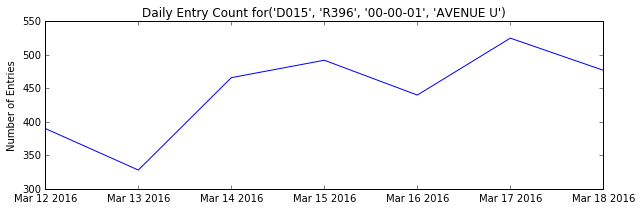

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
turnstile = list(daily.keys())[1]
values = daily[turnstile]
dates = [i[0] for i in values]
counts = [i[1] for i in values] 

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Daily Entry Count for' + str(turnstile))
plt.ylabel('Number of Entries')

<b>Challenge 5</b>

In [13]:
daily_combo_counts = defaultdict(dict)

for turnstile, data in daily.items():
    unique = (turnstile[0], turnstile[1], turnstile[3])
    if unique in daily_combo_counts:
        existing_data = daily_combo_counts.get(unique)
        for day in data:
            existing_data[day[0]] = existing_data.get(day[0], 0) + day[1]
    else:
        temp_d = OrderedDict()
        for day in sorted(data):
            temp_d[day[0]] =  day[1]
        daily_combo_counts[unique] = temp_d

In [14]:
daily_combo_counts_list = [{k:v} for k, v in daily_combo_counts.items()]
print(daily_combo_counts_list[:10])

[{('N512', 'R163', '14 ST'): OrderedDict([(datetime.date(2016, 3, 12), 4678), (datetime.date(2016, 3, 13), 3303), (datetime.date(2016, 3, 14), 5189), (datetime.date(2016, 3, 15), 5941), (datetime.date(2016, 3, 16), 5946), (datetime.date(2016, 3, 17), 6057), (datetime.date(2016, 3, 18), 4862)])}, {('PTH12', 'R542', 'TWENTY THIRD ST'): OrderedDict([(datetime.date(2016, 3, 12), 3440), (datetime.date(2016, 3, 13), 2428), (datetime.date(2016, 3, 14), 9533), (datetime.date(2016, 3, 15), 9870), (datetime.date(2016, 3, 16), 9963), (datetime.date(2016, 3, 17), 9636), (datetime.date(2016, 3, 18), 8312)])}, {('N087', 'R282', 'SPRING ST'): OrderedDict([(datetime.date(2016, 3, 12), 822), (datetime.date(2016, 3, 13), 513), (datetime.date(2016, 3, 14), 3602), (datetime.date(2016, 3, 15), 3519), (datetime.date(2016, 3, 16), 3569), (datetime.date(2016, 3, 17), 3483), (datetime.date(2016, 3, 18), 2862)])}, {('C021', 'R212', '59 ST'): OrderedDict([(datetime.date(2016, 3, 12), 6989), (datetime.date(2016, 

<b>Challenge 6</b>

In [25]:
daily_station_counts = defaultdict(dict)

for turnstile, data in daily.items():
    station = turnstile[3]
    if station in daily_station_counts:
        existing = daily_station_counts.get(station)
        for day in data:
            existing[day[0]] = existing.get(day[0], 0) + day[1]
    else:
        temp = OrderedDict()
        for day in sorted(data):
            temp[day[0]] = day[1]
    daily_station_counts[station]=temp
    


    



In [26]:
daily_station_list = [{k:v} for k, v in daily_station_counts.items()]
print(daily_station_list[:10])

[{'CONEY IS-STILLW': OrderedDict([(datetime.date(2016, 3, 12), 186399), (datetime.date(2016, 3, 13), 134684), (datetime.date(2016, 3, 14), 318413), (datetime.date(2016, 3, 15), 332091), (datetime.date(2016, 3, 16), 336134), (datetime.date(2016, 3, 17), 340187), (datetime.date(2016, 3, 18), 300974)])}, {'PAVONIA/NEWPORT': OrderedDict([(datetime.date(2016, 3, 12), 186399), (datetime.date(2016, 3, 13), 134684), (datetime.date(2016, 3, 14), 318413), (datetime.date(2016, 3, 15), 332091), (datetime.date(2016, 3, 16), 336134), (datetime.date(2016, 3, 17), 340187), (datetime.date(2016, 3, 18), 300974)])}, {'COURT SQ-23 ST': OrderedDict([(datetime.date(2016, 3, 12), 186399), (datetime.date(2016, 3, 13), 134684), (datetime.date(2016, 3, 14), 318413), (datetime.date(2016, 3, 15), 332091), (datetime.date(2016, 3, 16), 336134), (datetime.date(2016, 3, 17), 340187), (datetime.date(2016, 3, 18), 300974)])}, {'EXCHANGE PLACE': OrderedDict([(datetime.date(2016, 3, 12), 186399), (datetime.date(2016, 3, 

<b>Challenge 7</b>

In [27]:
import pandas
df = pandas.DataFrame(daily_station_counts)

In [28]:
df.head()

,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WESTCHESTER SQ,WHITEHALL S-FRY,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,YORK ST,ZEREGA AV
2016-03-12,186399,186399,66242,186399,66242,186399,186399,186399,66242,186399,...,381075,186399,266363,39281,186399,186399,132981,186399,14161,381075
2016-03-13,134684,134684,46828,134684,46828,134684,134684,134684,46828,134684,...,279531,134684,191933,29206,134684,134684,95039,134684,10181,279531
2016-03-14,318413,318413,107993,318413,107993,318413,318413,318413,107993,318413,...,630244,318413,443144,56285,318413,318413,214267,318413,27474,630244
2016-03-15,332091,332091,114934,332091,114934,332091,332091,332091,114934,332091,...,66401908,332091,472281,62099,332091,332091,1771636985,332091,29263,66401908
2016-03-16,336134,336134,118373,336134,118373,336134,336134,336134,118373,336134,...,681774,336134,478846,62113,336134,336134,228604,336134,29449,681774


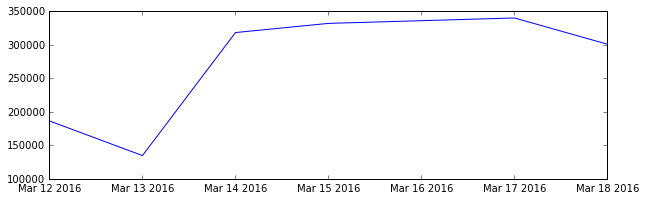

In [29]:
dates = list(df.index)
counts = list(df['14 ST-UNION SQ'].values)
plt.figure(figsize=(10,3))
plt.plot(dates, counts)
